In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holidays
import streamlit as st
import sklearn

In [2]:
# Cargar los datos desde la carpeta data/raw/entrenamiento
ventas_path = '../data/raw/entrenamiento/ventas.csv'
competencia_path = '../data/raw/entrenamiento/competencia.csv'

ventas_df = pd.read_csv(ventas_path)
competencia_df = pd.read_csv(competencia_path)

In [4]:
# Mostrar las primeras filas de los dataframes
print('Primeras filas de ventas_df:')
print(ventas_df.head())
print('\nPrimeras filas de competencia_df:')
print(competencia_df.head())

Primeras filas de ventas_df:
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  

In [5]:
ventas_df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74


In [6]:
competencia_df.head()

,fecha,producto_id,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,82.96,111.88,97.43
1,2021-10-25,PROD_002,112.56,108.61,115.58
2,2021-10-25,PROD_003,79.79,78.44,80.11
3,2021-10-25,PROD_004,72.60,67.29,74.45
4,2021-10-25,PROD_005,37.71,33.60,33.07


In [7]:
# Informe de calidad de datos para ventas_df
print('--- INFORME DE CALIDAD DE DATOS: ventas_df ---')
print('\nTipos de variables:')
print(ventas_df.dtypes)

print('\nValores nulos por columna:')
print(ventas_df.isnull().sum())

print('\nFilas duplicadas:')
print(ventas_df.duplicated().sum())

print('\nDescriptivos estadísticos:')
print(ventas_df.describe(include='all'))

print('\nTamaño del dataframe:')
print(ventas_df.shape)

print('\nPrimeras filas:')
print(ventas_df.head())

--- INFORME DE CALIDAD DE DATOS: ventas_df ---

Tipos de variables:
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object

Valores nulos por columna:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64

Filas duplicadas:
0

Descriptivos estadísticos:
             fecha producto_id                    nombre categoria  \
count         3552        3552                      3552      3552   
unique         148          24                        24         4   
top     2021-10-25    PROD_001  Nike Air Zoom Pegasus 40   Running   
freq            24         1

In [8]:
# Informe de calidad de datos para competencia_df
print('--- INFORME DE CALIDAD DE DATOS: competencia_df ---')
print('\nTipos de variables:')
print(competencia_df.dtypes)

print('\nValores nulos por columna:')
print(competencia_df.isnull().sum())

print('\nFilas duplicadas:')
print(competencia_df.duplicated().sum())

print('\nDescriptivos estadísticos:')
print(competencia_df.describe(include='all'))

print('\nTamaño del dataframe:')
print(competencia_df.shape)

print('\nPrimeras filas:')
print(competencia_df.head())

--- INFORME DE CALIDAD DE DATOS: competencia_df ---

Tipos de variables:
fecha            object
producto_id      object
Amazon          float64
Decathlon       float64
Deporvillage    float64
dtype: object

Valores nulos por columna:
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64

Filas duplicadas:
0

Descriptivos estadísticos:
             fecha producto_id       Amazon    Decathlon  Deporvillage
count         3552        3552  3552.000000  3552.000000   3552.000000
unique         148          24          NaN          NaN           NaN
top     2021-10-25    PROD_001          NaN          NaN           NaN
freq            24         148          NaN          NaN           NaN
mean           NaN         NaN   118.623407   111.412182    118.894628
std            NaN         NaN   156.095628   148.508132    160.216448
min            NaN         NaN    16.850000    15.450000     16.770000
25%            NaN         NaN    47.117500  

In [9]:
# Convertir la columna fecha a datetime en ambos dataframes
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

# Verificar la conversión
def print_fecha_dtype(df, nombre):
    print(f"Tipo de fecha en {nombre}:", df['fecha'].dtype)

print_fecha_dtype(ventas_df, 'ventas_df')
print_fecha_dtype(competencia_df, 'competencia_df')

Tipo de fecha en ventas_df: datetime64[ns]
Tipo de fecha en competencia_df: datetime64[ns]


In [35]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [36]:
competencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         3552 non-null   datetime64[ns]
 1   producto_id   3552 non-null   object        
 2   Amazon        3552 non-null   float64       
 3   Decathlon     3552 non-null   float64       
 4   Deporvillage  3552 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 138.9+ KB


In [10]:
# Integrar ventas_df y competencia_df en un nuevo dataframe df usando fecha y producto_id como claves

df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], how='inner', suffixes=('_ventas', '_competencia'))

# Mostrar las primeras filas del nuevo dataframe integrado
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## 1. Gráficos de líneas temporales por año: suma de unidades vendidas y Black Fridays
En este análisis se muestra la evolución de las unidades vendidas por día para cada año, marcando los días de Black Friday en cada gráfico.

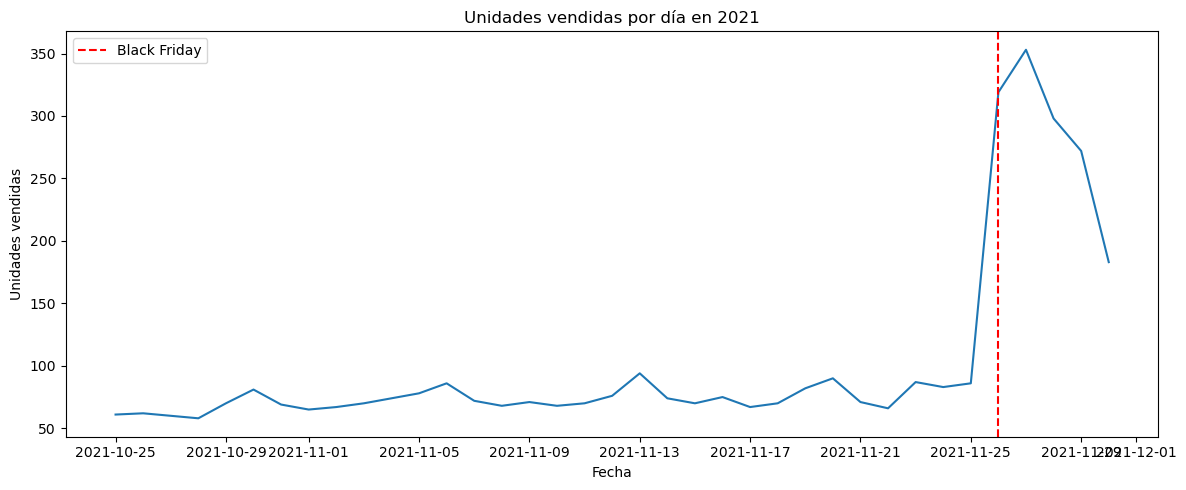

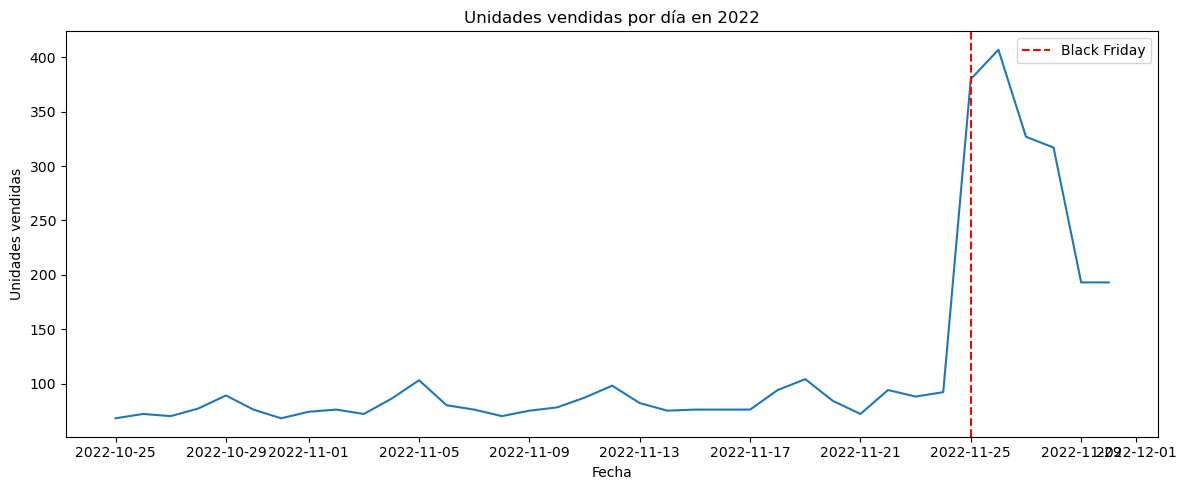

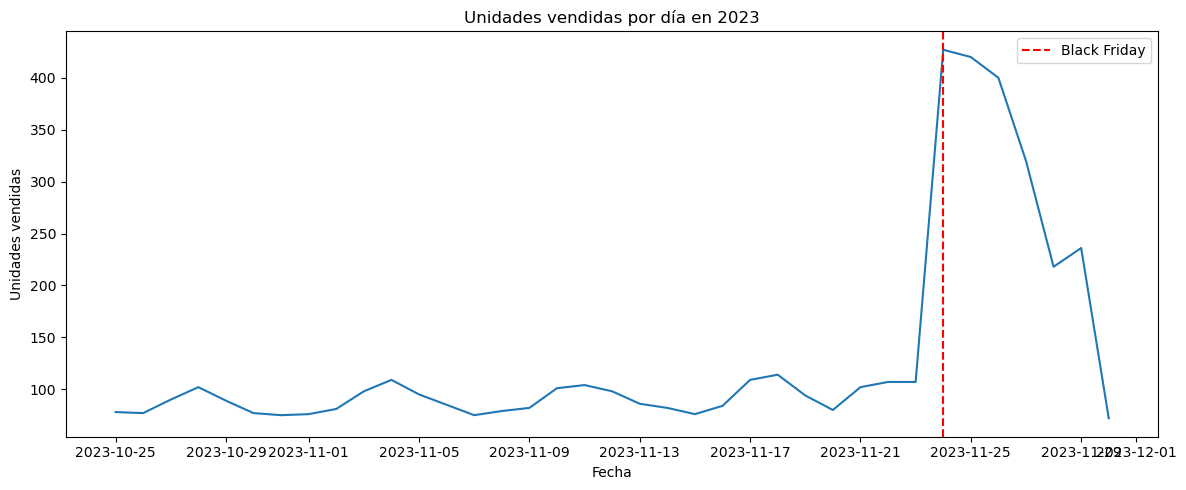

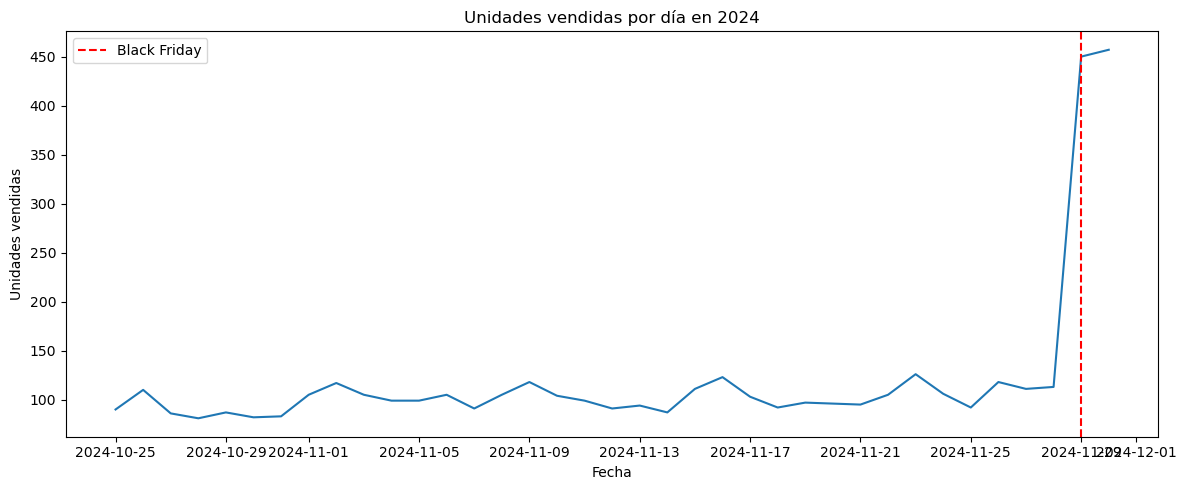

In [12]:
# Crear columna de año y día para el análisis temporal
df['año'] = df['fecha'].dt.year
df['dia'] = df['fecha'].dt.date

# Calcular los días de Black Friday para cada año
black_fridays = []
for year in df['año'].unique():
    # El cuarto jueves de noviembre
    nov = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30', freq='D')
    thursdays = nov[nov.weekday == 3]
    if len(thursdays) >= 4:
        bf_date = thursdays[3] + pd.Timedelta(days=1)
        black_fridays.append(bf_date.date())

# Graficar líneas temporales por año
for year in sorted(df['año'].unique()):
    plt.figure(figsize=(12,5))
    datos = df[df['año'] == year].groupby('dia')['unidades_vendidas'].sum().reset_index()
    sns.lineplot(data=datos, x='dia', y='unidades_vendidas')
    # Marcar Black Friday
    bf = [d for d in black_fridays if pd.to_datetime(d).year == year]
    for bfd in bf:
        plt.axvline(pd.to_datetime(bfd), color='red', linestyle='--', label='Black Friday')
    plt.title(f'Unidades vendidas por día en {year}')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.tight_layout()
    plt.show()

## 2. Suma de unidades vendidas por día de la semana
A continuación se muestra cómo varían las ventas según el día de la semana.

C:\Users\guill\AppData\Local\Temp\ipykernel_8744\352623526.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_dia.index, y=ventas_por_dia.values, palette='viridis')


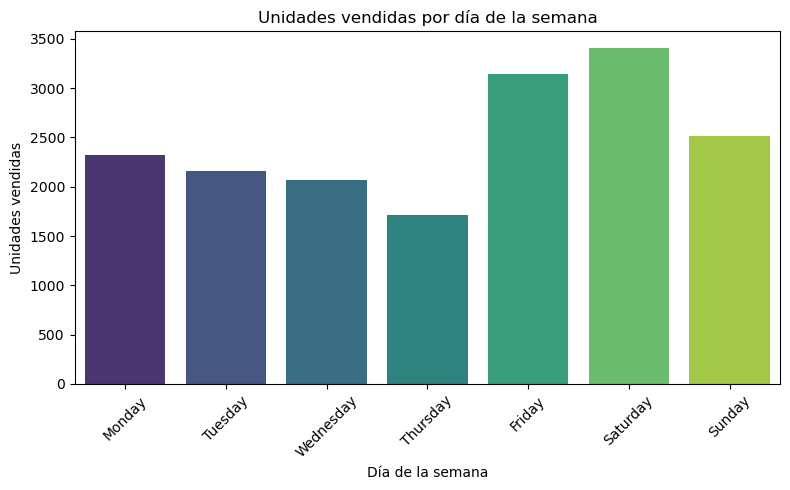

In [13]:
# Crear columna de día de la semana
df['dia_semana'] = df['fecha'].dt.day_name()

# Sumar unidades vendidas por día de la semana
ventas_por_dia = df.groupby('dia_semana')['unidades_vendidas'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8,5))
sns.barplot(x=ventas_por_dia.index, y=ventas_por_dia.values, palette='viridis')
plt.title('Unidades vendidas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Suma de unidades vendidas por categoría
Visualización de las ventas totales agrupadas por categoría de producto.

C:\Users\guill\AppData\Local\Temp\ipykernel_8744\3534083423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='mako')


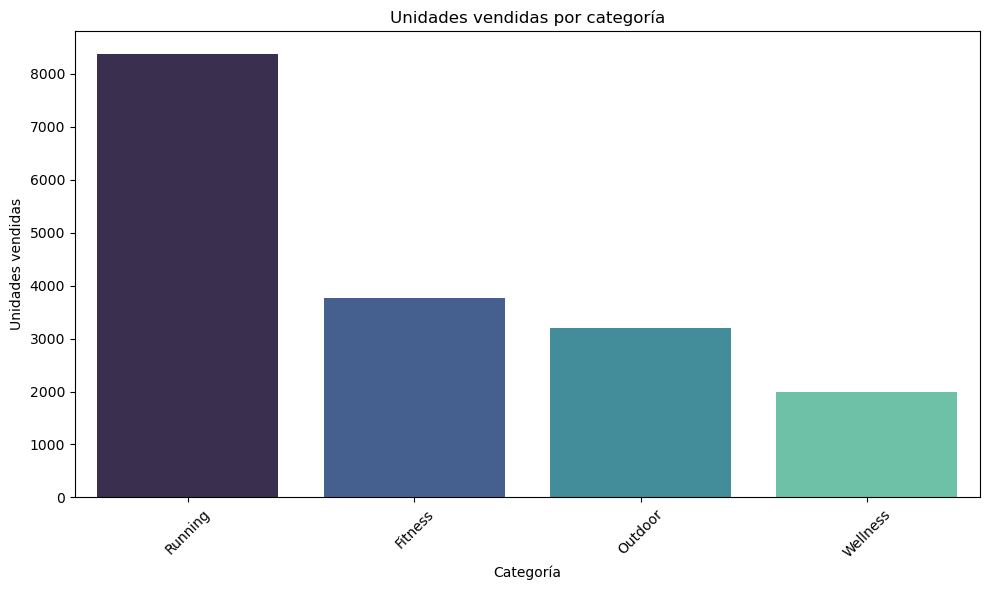

In [14]:
# Sumar unidades vendidas por categoría
ventas_por_categoria = df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=ventas_por_categoria.index, y=ventas_por_categoria.values, palette='mako')
plt.title('Unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Suma de unidades vendidas por subcategoría
Visualización de las ventas totales agrupadas por subcategoría de producto.

C:\Users\guill\AppData\Local\Temp\ipykernel_8744\667119007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_subcategoria.index, y=ventas_por_subcategoria.values, palette='crest')


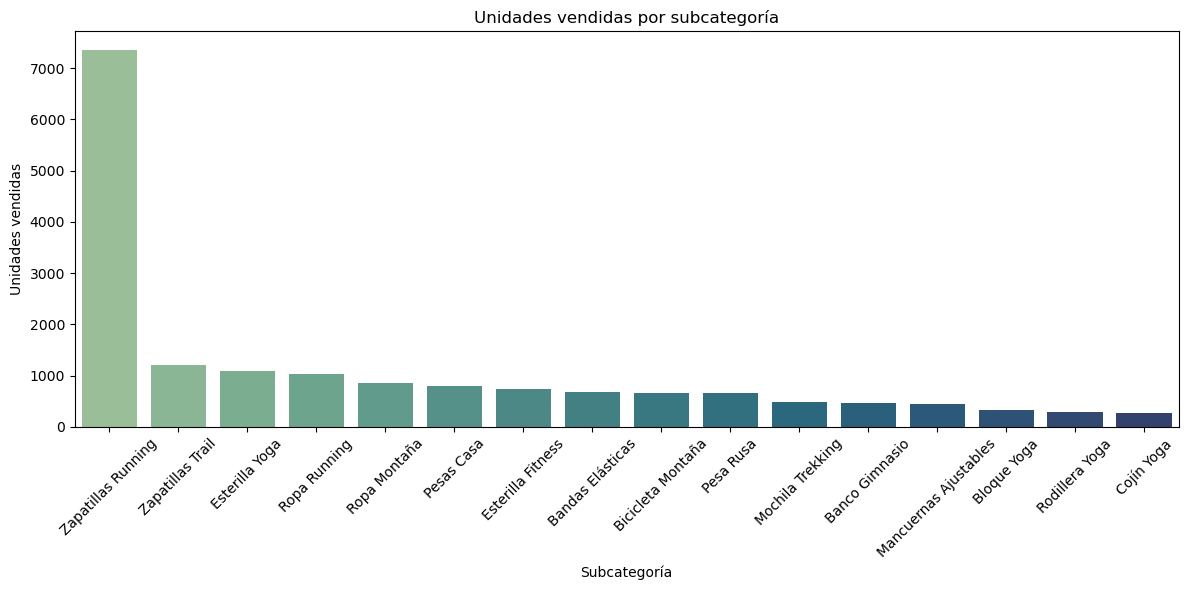

In [15]:
# Sumar unidades vendidas por subcategoría
ventas_por_subcategoria = df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=ventas_por_subcategoria.index, y=ventas_por_subcategoria.values, palette='crest')
plt.title('Unidades vendidas por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Suma de unidades vendidas por los productos top
Visualización de los productos con mayor cantidad de unidades vendidas.

C:\Users\guill\AppData\Local\Temp\ipykernel_8744\4140507937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.index, y=top_productos.values, palette='flare')


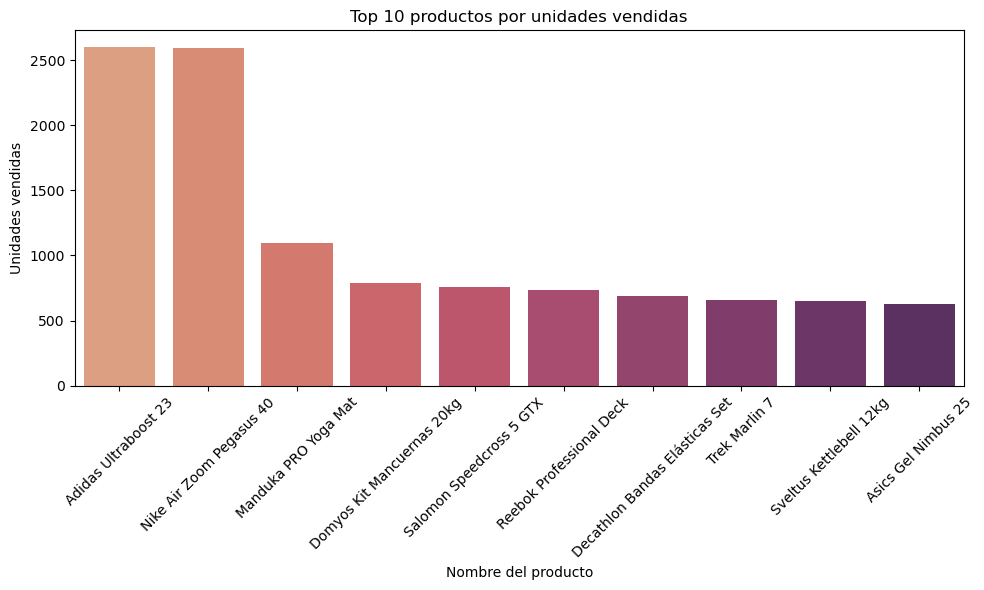

C:\Users\guill\AppData\Local\Temp\ipykernel_8744\4140507937.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.index.astype(str), y=top_productos.values, palette='flare')


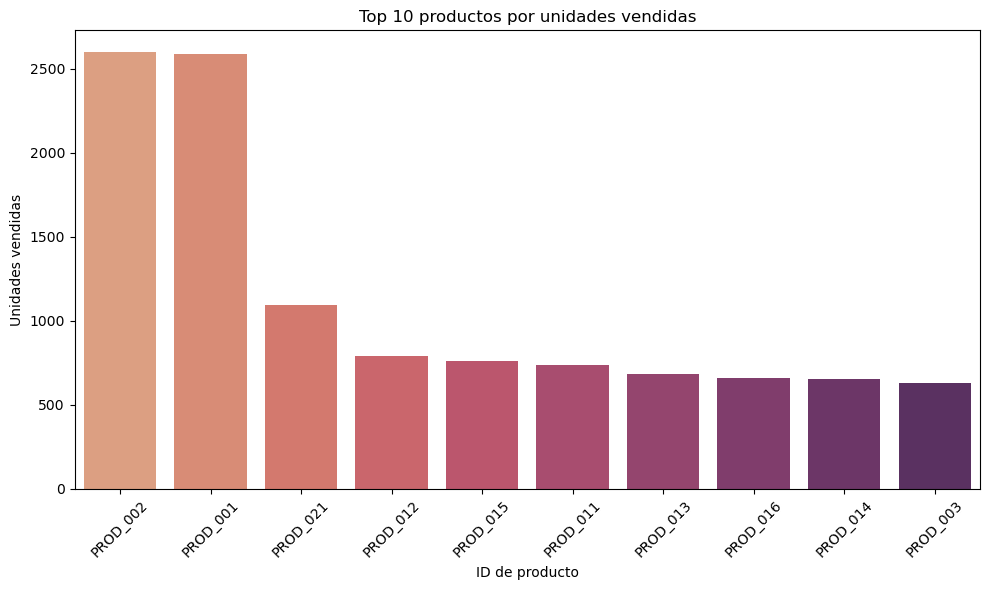

In [16]:
# Seleccionar los 10 productos con más unidades vendidas y mostrar el nombre real
top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_productos.index, y=top_productos.values, palette='flare')
plt.title('Top 10 productos por unidades vendidas')
plt.xlabel('Nombre del producto')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_productos = df.groupby('producto_id')['unidades_vendidas'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_productos.index.astype(str), y=top_productos.values, palette='flare')
plt.title('Top 10 productos por unidades vendidas')
plt.xlabel('ID de producto')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Densidad de distribución de precios nuestros y de Amazon
Comparación de la distribución de precios propios y de la competencia (Amazon) usando gráficos de densidad.

Columnas de df: ['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria', 'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta', 'ingresos', 'Amazon', 'Decathlon', 'Deporvillage', 'año', 'mes', 'dia_mes', 'dia_semana_num', 'dia_semana', 'es_fin_de_semana', 'es_festivo', 'es_black_friday', 'es_cyber_monday', 'es_primer_dia_mes', 'es_ultimo_dia_mes', 'semana_año', 'dia']
Columnas de precio encontradas: ['precio_base', 'precio_venta']


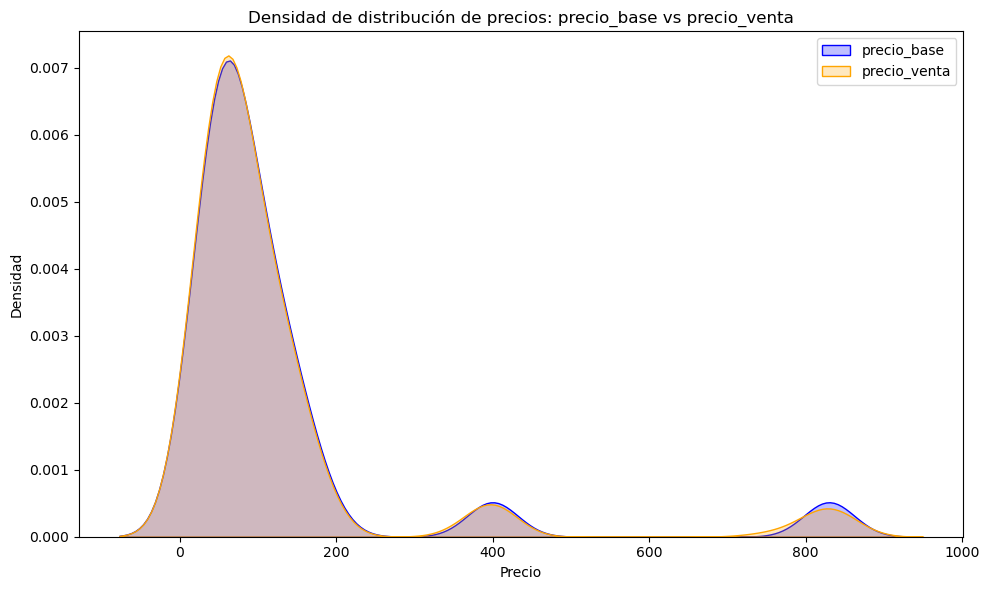

In [17]:
# Mostrar las columnas disponibles en df para identificar los precios
print('Columnas de df:', df.columns.tolist())

# Si existen columnas relacionadas con precios, graficar la densidad
# Ejemplo: buscar columnas que contengan "precio"
precio_cols = [col for col in df.columns if 'precio' in col.lower()]
print('Columnas de precio encontradas:', precio_cols)

# Si hay al menos dos columnas de precio, graficar la densidad
if len(precio_cols) >= 2:
    plt.figure(figsize=(10,6))
    sns.kdeplot(df[precio_cols[0]], label=precio_cols[0], fill=True, color='blue')
    sns.kdeplot(df[precio_cols[1]], label=precio_cols[1], fill=True, color='orange')
    plt.title(f'Densidad de distribución de precios: {precio_cols[0]} vs {precio_cols[1]}')
    plt.xlabel('Precio')
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('No se encontraron al menos dos columnas de precio para comparar.')

## Creación de variables temporales y de calendario
En esta celda se crean variables temporales y de calendario relevantes para el análisis y modelado, utilizando la librería holidays para España.

In [18]:
# Mostrar las columnas disponibles en df para depuración
print('Columnas actuales en df:', df.columns.tolist())

# Mostrar las variables temporales y de calendario en formato DataFrame si existen
cols_temp = ['fecha','año','mes','dia_mes','dia_semana','nombre_dia_semana','es_fin_de_semana','es_festivo','es_black_friday','es_cyber_monday','es_primer_dia_mes','es_ultimo_dia_mes','semana_año']
cols_existentes = [col for col in cols_temp if col in df.columns]

if cols_existentes:
    display(df[cols_existentes].head(10))
else:
    print('No existen las variables temporales solicitadas en el DataFrame.')

Columnas actuales en df: ['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria', 'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta', 'ingresos', 'Amazon', 'Decathlon', 'Deporvillage', 'año', 'mes', 'dia_mes', 'dia_semana_num', 'dia_semana', 'es_fin_de_semana', 'es_festivo', 'es_black_friday', 'es_cyber_monday', 'es_primer_dia_mes', 'es_ultimo_dia_mes', 'semana_año', 'dia']


,fecha,año,mes,dia_mes,dia_semana,es_fin_de_semana,es_festivo,es_black_friday,es_cyber_monday,es_primer_dia_mes,es_ultimo_dia_mes,semana_año
0,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
1,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
2,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
3,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
4,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
5,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
6,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
7,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
8,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43
9,2021-10-25,2021,10,25,Monday,False,False,False,False,False,False,43


In [11]:
# Crear todas las variables temporales y de calendario solicitadas
import holidays

df['año'] = df['fecha'].dt.year

df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana_num'] = df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['dia_semana'] = df['fecha'].dt.day_name()
df['es_fin_de_semana'] = df['dia_semana_num'].isin([5, 6])

# Festivos en España
df['es_festivo'] = df['fecha'].dt.date.isin(holidays.country_holidays('ES', years=df['año'].unique()))

# Black Friday: cuarto viernes de noviembre
def es_black_friday(fecha):
    year = fecha.year
    nov = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30', freq='D')
    fridays = nov[nov.weekday == 4]
    if len(fridays) >= 4:
        bf_date = fridays[3].date()
        return fecha.date() == bf_date
    return False

df['es_black_friday'] = df['fecha'].apply(es_black_friday)

# Cyber Monday: lunes siguiente al Black Friday
def es_cyber_monday(fecha):
    year = fecha.year
    nov = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30', freq='D')
    fridays = nov[nov.weekday == 4]
    if len(fridays) >= 4:
        bf_date = fridays[3]
        cm_date = bf_date + pd.Timedelta(days=3)
        return fecha.date() == cm_date.date()
    return False

df['es_cyber_monday'] = df['fecha'].apply(es_cyber_monday)

# Primer y último día de mes
df['es_primer_dia_mes'] = df['dia_mes'] == 1
df['es_ultimo_dia_mes'] = df['fecha'] == df['fecha'] + pd.offsets.MonthEnd(0)
# Semana del año
df['semana_año'] = df['fecha'].dt.isocalendar().week

# Mostrar todas las variables temporales y de calendario en formato DataFrame
temp_cols = ['fecha','año','mes','dia_mes','dia_semana','dia_semana_num','es_fin_de_semana','es_festivo','es_black_friday','es_cyber_monday','es_primer_dia_mes','es_ultimo_dia_mes','semana_año']
display(df[temp_cols].head(20))

,fecha,año,mes,dia_mes,dia_semana,dia_semana_num,es_fin_de_semana,es_festivo,es_black_friday,es_cyber_monday,es_primer_dia_mes,es_ultimo_dia_mes,semana_año
0,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
1,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
2,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
3,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
4,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
5,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
6,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
7,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
8,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43
9,2021-10-25,2021,10,25,Monday,0,False,False,False,False,False,False,43


## Creación de variables de lags y media móvil
En esta celda se crean los lags de unidades vendidas (del 1 al 7) y la media móvil de 7 días, calculados por año para evitar mezcla entre años. Se eliminan los registros con nulos en alguna de estas nuevas variables.

In [53]:
df.shape

(3552, 34)

In [19]:
# Crear lags de unidades vendidas y media móvil de 7 días por año
lags = range(1, 8)
for lag in lags:
    df[f'unidades_vendidas_lag{lag}'] = df.groupby('año')['unidades_vendidas'].shift(lag)

df['unidades_vendidas_mm7'] = df.groupby('año')['unidades_vendidas'].rolling(window=7).mean().reset_index(level=0, drop=True)

# Eliminar registros con nulos en alguna de las nuevas variables
cols_lags_mm = [f'unidades_vendidas_lag{lag}' for lag in lags] + ['unidades_vendidas_mm7']
df_lags = df.dropna(subset=cols_lags_mm).copy()

# Mostrar las primeras filas para verificar
display(df_lags[['fecha','año','unidades_vendidas'] + cols_lags_mm].head(10))

,fecha,año,unidades_vendidas,unidades_vendidas_lag1,unidades_vendidas_lag2,unidades_vendidas_lag3,unidades_vendidas_lag4,unidades_vendidas_lag5,unidades_vendidas_lag6,unidades_vendidas_lag7,unidades_vendidas_mm7
7,2021-10-25,2021,2,2.0,2.0,2.0,2.0,2.0,10.0,6.0,3.142857
8,2021-10-25,2021,2,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.000000
9,2021-10-25,2021,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000
10,2021-10-25,2021,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.142857
11,2021-10-25,2021,3,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.285714
12,2021-10-25,2021,2,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.285714
13,2021-10-25,2021,2,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.285714
14,2021-10-25,2021,3,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.428571
15,2021-10-25,2021,2,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.428571
16,2021-10-25,2021,1,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.285714


In [20]:
# Crear la variable descuento porcentaje
# Suponiendo que las columnas se llaman 'precio_venta' y 'precio_base'
df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100

# Mostrar las primeras filas para verificar
display(df[['fecha', 'precio_venta', 'precio_base', 'descuento_porcentaje']].head(10))

,fecha,precio_venta,precio_base,descuento_porcentaje
0,2021-10-25,118.36,115,2.921739
1,2021-10-25,136.82,135,1.348148
2,2021-10-25,84.93,85,-0.082353
3,2021-10-25,75.42,75,0.560000
4,2021-10-25,35.87,35,2.485714
5,2021-10-25,65.51,65,0.784615
6,2021-10-25,70.98,70,1.400000
7,2021-10-25,66.60,65,2.461538
8,2021-10-25,392.31,400,-1.922500
9,2021-10-25,174.92,175,-0.045714


In [57]:
df.columns

Index(['fecha', 'producto_id', 'nombre', 'categoria', 'subcategoria',
       'precio_base', 'es_estrella', 'unidades_vendidas', 'precio_venta',
       'ingresos', 'Amazon', 'Decathlon', 'Deporvillage', 'año', 'dia',
       'dia_semana', 'mes', 'dia_mes', 'dia_semana_num', 'es_fin_de_semana',
       'es_festivo', 'es_black_friday', 'es_cyber_monday', 'es_primer_dia_mes',
       'es_ultimo_dia_mes', 'semana_año', 'unidades_vendidas_lag1',
       'unidades_vendidas_lag2', 'unidades_vendidas_lag3',
       'unidades_vendidas_lag4', 'unidades_vendidas_lag5',
       'unidades_vendidas_lag6', 'unidades_vendidas_lag7',
       'unidades_vendidas_mm7', 'descuento_porcentaje'],
      dtype='object')

In [67]:
df["descuento_porcentaje"] = ((df["precio_venta"] - df["precio_base"]) / df["precio_base"]) * 100

df[["fecha", "producto_id", "precio_venta", "precio_base", "descuento_porcentaje"]].head(10)

,fecha,producto_id,precio_venta,precio_base,descuento_porcentaje
0,2021-10-25,PROD_001,118.36,115,2.921739
1,2021-10-25,PROD_002,136.82,135,1.348148
2,2021-10-25,PROD_003,84.93,85,-0.082353
3,2021-10-25,PROD_004,75.42,75,0.560000
4,2021-10-25,PROD_005,35.87,35,2.485714
5,2021-10-25,PROD_006,65.51,65,0.784615
6,2021-10-25,PROD_007,70.98,70,1.400000
7,2021-10-25,PROD_008,66.60,65,2.461538
8,2021-10-25,PROD_009,392.31,400,-1.922500
9,2021-10-25,PROD_010,174.92,175,-0.045714


In [71]:
df.precio_competencia

0        97.423333
1       112.250000
2        79.446667
3        71.446667
4        34.793333
           ...    
3547     80.543333
3548    131.500000
3549     19.426667
3550     33.310000
3551     47.413333
Name: precio_competencia, Length: 3552, dtype: float64

In [74]:
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']
df[["fecha", "producto_id", "precio_venta", "precio_competencia", "ratio_precio"]].head(10)

,fecha,producto_id,precio_venta,precio_competencia,ratio_precio
0,2021-10-25,PROD_001,118.36,97.423333,1.214904
1,2021-10-25,PROD_002,136.82,112.250000,1.218886
2,2021-10-25,PROD_003,84.93,79.446667,1.069019
3,2021-10-25,PROD_004,75.42,71.446667,1.055613
4,2021-10-25,PROD_005,35.87,34.793333,1.030945
5,2021-10-25,PROD_006,65.51,64.456667,1.016342
6,2021-10-25,PROD_007,70.98,68.636667,1.034141
7,2021-10-25,PROD_008,66.60,64.346667,1.035019
8,2021-10-25,PROD_009,392.31,350.850000,1.118170
9,2021-10-25,PROD_010,174.92,160.156667,1.092181


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   3552 non-null   datetime64[ns]
 1   producto_id             3552 non-null   object        
 2   nombre                  3552 non-null   object        
 3   categoria               3552 non-null   object        
 4   subcategoria            3552 non-null   object        
 5   precio_base             3552 non-null   int64         
 6   es_estrella             3552 non-null   bool          
 7   unidades_vendidas       3552 non-null   int64         
 8   precio_venta            3552 non-null   float64       
 9   ingresos                3552 non-null   float64       
 10  año                     3552 non-null   int32         
 11  dia                     3552 non-null   object        
 12  dia_semana              3552 non-null   object  

In [ ]:
# 🤖 Crear copias de las variables y hacer one hot encoding
df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']

# One hot encoding sobre las nuevas variables
df = pd.get_dummies(df, columns=['nombre_h', 'categoria_h', 'subcategoria_h'])

# Mostrar las primeras filas para verificar
display(df.head(10))

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,False,False,False,False,False,False,False,False,True,False
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,False,False,False,False,False,False,False,False,True,False
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,False,False,False,False,False,False,False,False,True,False
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,False,False,False,False,False,False,False,False,True,False
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,False,False,False,False,False,False,False,True,False,False
5,2021-10-25,PROD_006,Adidas Own The Run Jacket,Running,Ropa Running,65,False,2,65.51,131.02,...,False,False,False,False,False,False,False,True,False,False
6,2021-10-25,PROD_007,Puma Velocity Nitro 2,Running,Zapatillas Running,70,False,2,70.98,141.96,...,False,False,False,False,False,False,False,False,True,False
7,2021-10-25,PROD_008,Reebok Floatride Energy 5,Running,Zapatillas Running,65,False,2,66.60,133.20,...,False,False,False,False,False,False,False,False,True,False
8,2021-10-25,PROD_009,Bowflex SelectTech 552,Fitness,Mancuernas Ajustables,400,True,2,392.31,784.62,...,False,True,False,False,False,False,False,False,False,False
9,2021-10-25,PROD_010,Domyos BM900,Fitness,Banco Gimnasio,175,True,2,174.92,349.84,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 🤖 Guardar el DataFrame df en la carpeta data/processed
df.to_csv('../data/processed/df.csv', index=False)
print('DataFrame guardado en data/processed/df.csv')

DataFrame guardado en data/processed/df.csv


In [79]:
# 🤖 Dividir df en train_df (2021-2023) y validation_df (2024) y mostrar el número de registros
train_df = df[df['año'].isin([2021, 2022, 2023])].copy()
validation_df = df[df['año'] == 2024].copy()
print(f'Registros en train_df (2021-2023): {len(train_df)}')
print(f'Registros en validation_df (2024): {len(validation_df)}')

Registros en train_df (2021-2023): 2664
Registros en validation_df (2024): 888


In [21]:
# 🤖 Entrenamiento y validación de HistGradientBoostingRegressor con parámetros conservadores
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Seleccionar variables predictoras (excluyendo fecha, ingresos y tipo object)
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
predictoras = [col for col in train_df.columns if col not in excluir and train_df[col].dtype != 'O']

X_train = train_df[predictoras]
y_train = train_df['unidades_vendidas']
X_val = validation_df[predictoras]
y_val = validation_df['unidades_vendidas']

# Modelo con parámetros conservadores
model = HistGradientBoostingRegressor(learning_rate=0.05, max_iter=400, max_depth=7, l2_regularization=1.0, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_val)

# Baseline naive: predice la media de train
y_naive = np.full_like(y_val, y_train.mean(), dtype=np.float64)

# Métricas de forecasting
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

mae_naive = mean_absolute_error(y_val, y_naive)
rmse_naive = np.sqrt(mean_squared_error(y_val, y_naive))
r2_naive = r2_score(y_val, y_naive)

print('--- HistGradientBoostingRegressor ---')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.3f}')

print('\n--- Baseline Naive (media) ---')
print(f'MAE: {mae_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')
print(f'R2: {r2_naive:.3f}')

NameError: name 'train_df' is not defined

In [83]:
# 🤖 Calcular la métrica MSE en ambos modelos
mse = mean_squared_error(y_val, y_pred)
mse_naive = mean_squared_error(y_val, y_naive)
print(f'MSE: {mse:.2f}')
print(f'MSE Naive: {mse_naive:.2f}')

MSE: 2.14
MSE Naive: 39.06


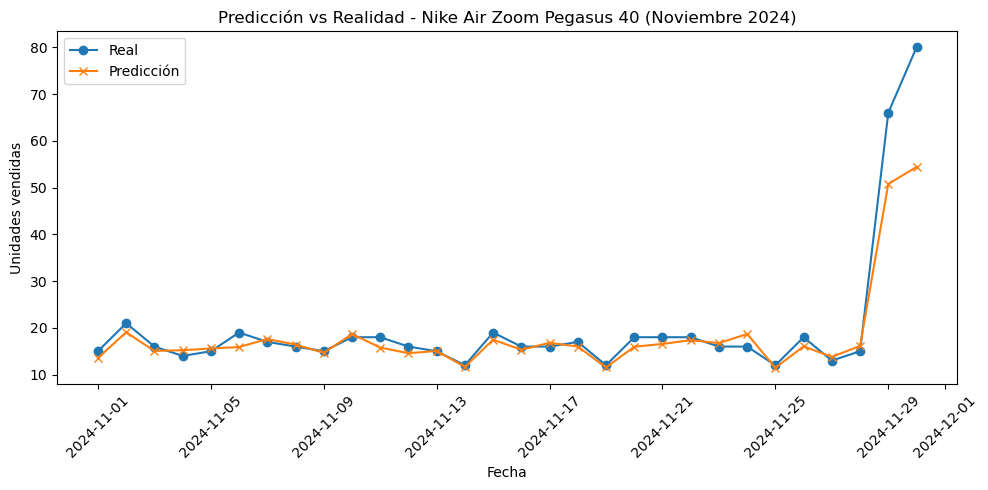

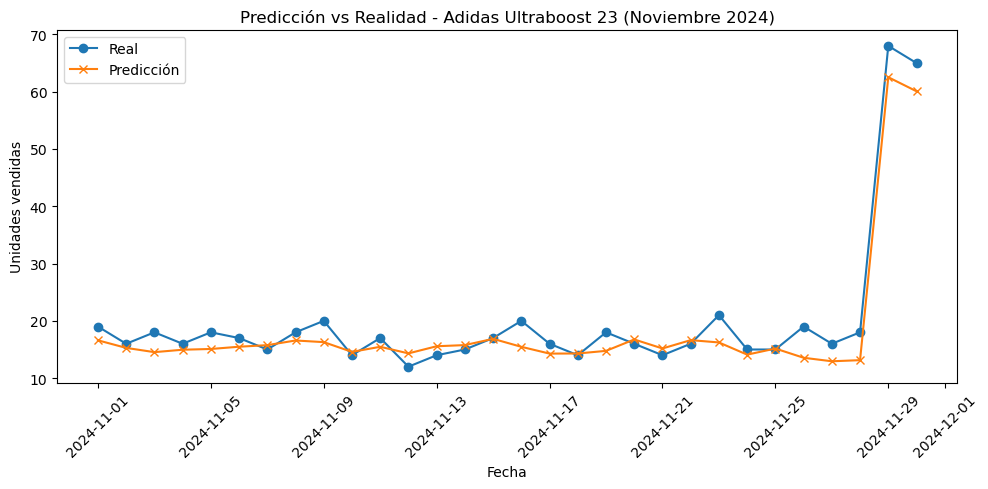

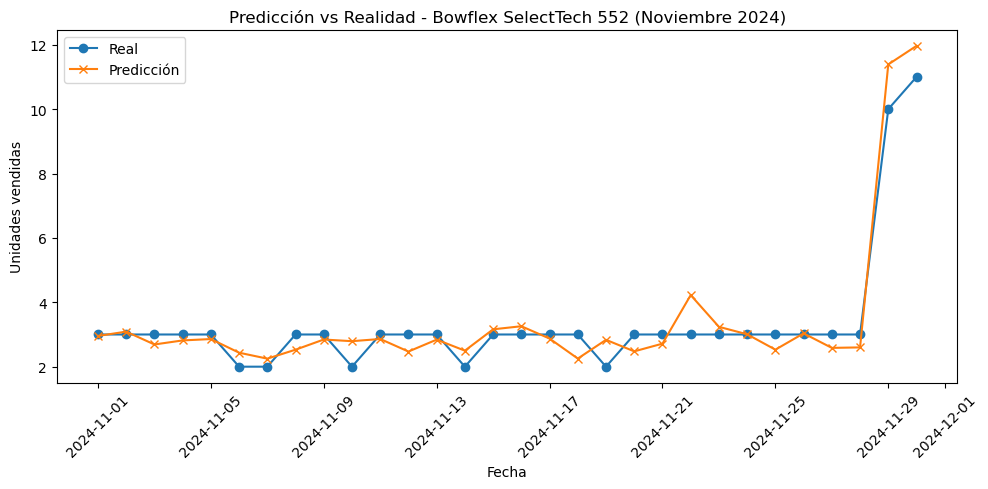

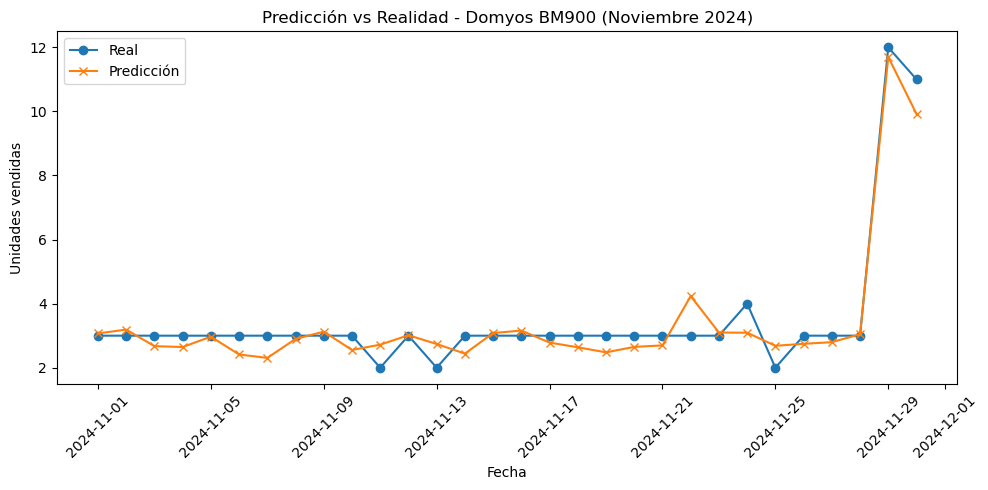

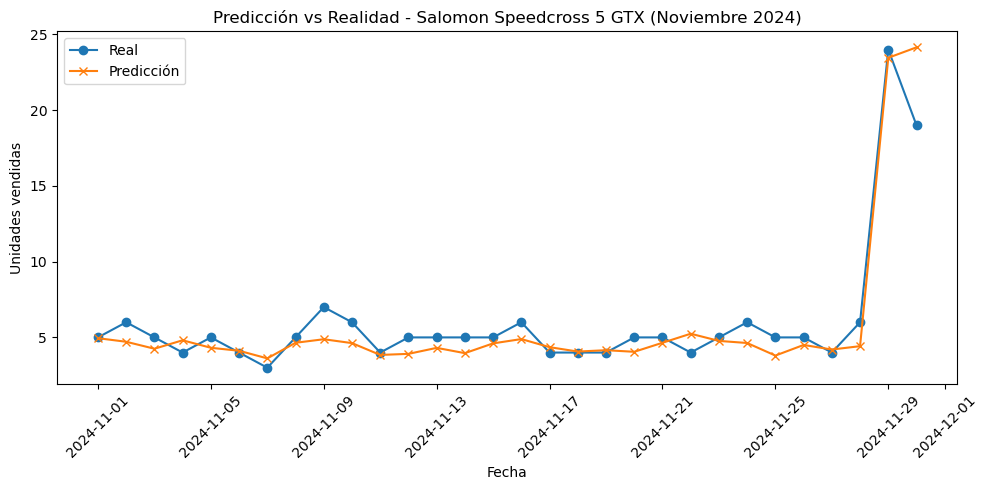

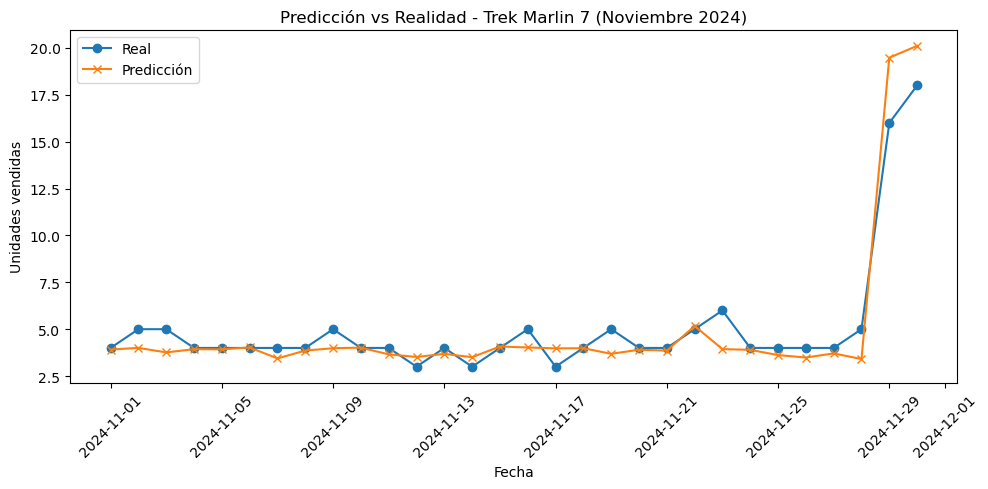

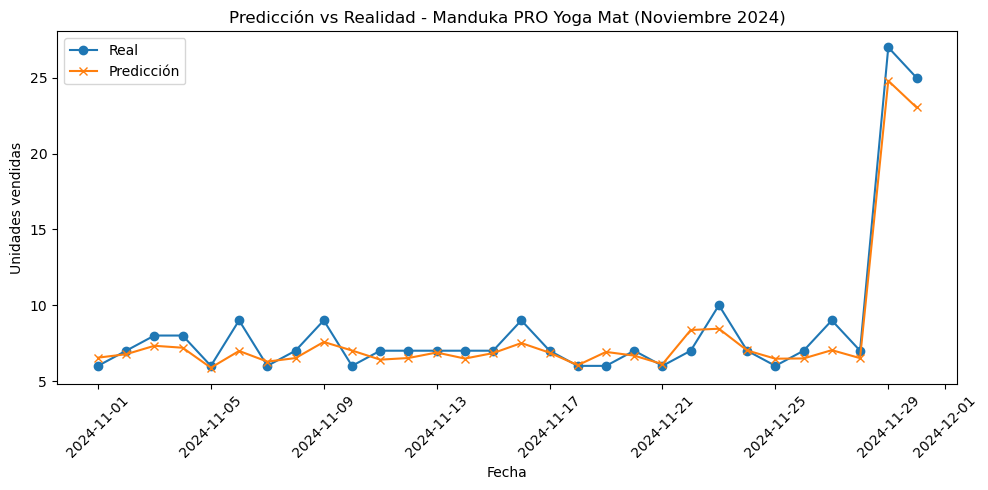

In [84]:
# 🤖 Predicciones y gráficos para los 7 productos estrella en noviembre de 2024
import matplotlib.pyplot as plt

# Filtrar noviembre 2024 y productos estrella
nov_2024 = df[(df['año'] == 2024) & (df['mes'] == 11) & (df['es_estrella'])].copy()
productos_estrella = nov_2024['nombre'].unique()[:7]  # Tomar los 7 primeros si hay más

for producto in productos_estrella:
    datos = nov_2024[nov_2024['nombre'] == producto].copy()
    X_nov = datos[predictoras]
    y_real = datos['unidades_vendidas']
    fechas = datos['fecha']
    y_pred = model.predict(X_nov)
    plt.figure(figsize=(10,5))
    plt.plot(fechas, y_real, label='Real', marker='o')
    plt.plot(fechas, y_pred, label='Predicción', marker='x')
    plt.title(f'Predicción vs Realidad - {producto} (Noviembre 2024)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [85]:
# 🤖 Calcular el MAE para cada producto estrella en noviembre de 2024
from sklearn.metrics import mean_absolute_error

mae_productos = {}
for producto in productos_estrella:
    datos = nov_2024[nov_2024['nombre'] == producto].copy()
    X_nov = datos[predictoras]
    y_real = datos['unidades_vendidas']
    y_pred = model.predict(X_nov)
    mae = mean_absolute_error(y_real, y_pred)
    mae_productos[producto] = mae

print('MAE por producto estrella en noviembre 2024:')
for producto, mae in mae_productos.items():
    print(f'{producto}: MAE = {mae:.2f}')

MAE por producto estrella en noviembre 2024:
Nike Air Zoom Pegasus 40: MAE = 2.42
Adidas Ultraboost 23: MAE = 2.23
Bowflex SelectTech 552: MAE = 0.41
Domyos BM900: MAE = 0.39
Salomon Speedcross 5 GTX: MAE = 0.88
Trek Marlin 7: MAE = 0.67
Manduka PRO Yoga Mat: MAE = 0.77


In [22]:
# 🤖 Analizar la degradación del error a lo largo de noviembre de 2024 en 3 periodos de 10 días
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Crear los periodos
nov_2024['dia_mes'] = nov_2024['fecha'].dt.day
periodos = [(1,10), (11,20), (21,30)]
mae_periodos = []
rmse_periodos = []
labels = []

for inicio, fin in periodos:
    datos_periodo = nov_2024[(nov_2024['dia_mes'] >= inicio) & (nov_2024['dia_mes'] <= fin)]
    if len(datos_periodo) > 0:
        X_periodo = datos_periodo[predictoras]
        y_real = datos_periodo['unidades_vendidas']
        y_pred = model.predict(X_periodo)
        mae = mean_absolute_error(y_real, y_pred)
        rmse = np.sqrt(mean_squared_error(y_real, y_pred))
        mae_periodos.append(mae)
        rmse_periodos.append(rmse)
        labels.append(f'{inicio}-{fin}')

print('MAE por periodo de noviembre 2024:')
for l, m in zip(labels, mae_periodos):
    print(f'{l}: MAE = {m:.2f}')

plt.figure(figsize=(8,5))
plt.plot(labels, mae_periodos, marker='o', label='MAE')
plt.plot(labels, rmse_periodos, marker='x', label='RMSE')
plt.title('Evolución del error por periodo en noviembre 2024')
plt.xlabel('Periodo (días)')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'nov_2024' is not defined

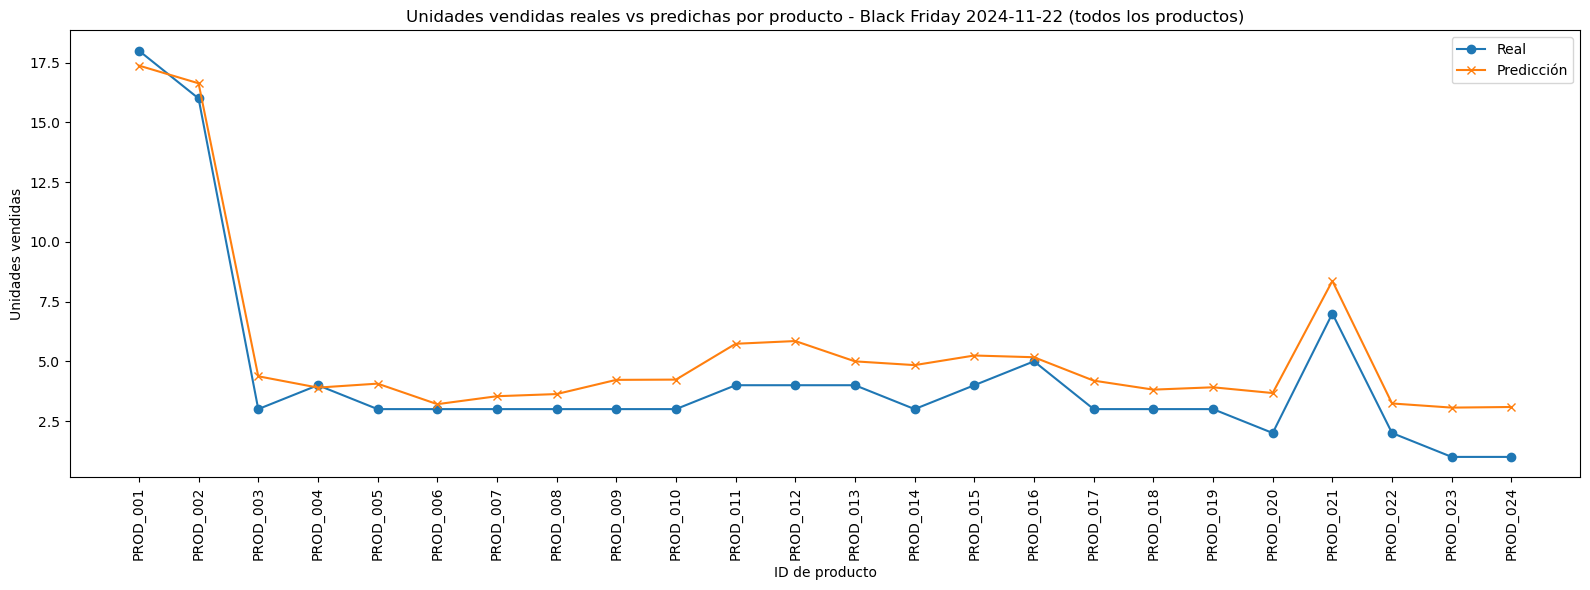

In [89]:
# 🤖 Análisis específico de Black Friday 2024: gráfico real vs predicho por producto (todos los productos)
black_friday_fecha = df[(df['año'] == 2024) & (df['mes'] == 11) & (df['es_black_friday'])]['fecha'].unique()
if len(black_friday_fecha) > 0:
    fecha_bf = black_friday_fecha[0]
    datos_bf = df[(df['fecha'] == fecha_bf)].copy()
    X_bf = datos_bf[predictoras]
    y_real = datos_bf['unidades_vendidas']
    y_pred = model.predict(X_bf)
    producto_ids = datos_bf['producto_id'].astype(str)
    # Ordenar por ID de producto para mayor claridad
    orden = np.argsort(producto_ids)
    producto_ids = producto_ids.iloc[orden]
    y_real = y_real.iloc[orden]
    y_pred = y_pred[orden]
    plt.figure(figsize=(16,6))
    plt.plot(producto_ids, y_real, label='Real', marker='o')
    plt.plot(producto_ids, y_pred, label='Predicción', marker='x')
    plt.title(f'Unidades vendidas reales vs predichas por producto - Black Friday {fecha_bf.date()} (todos los productos)')
    plt.xlabel('ID de producto')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print('No se encontró registro de Black Friday en noviembre 2024.')

In [23]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

excluir = ['fecha', 'ingresos', 'unidades_vendidas', 'nombre', "producto_id",'categoria', 'subcategoria']
x_full = df.drop(columns=[col for col in excluir if col in df.columns] + [col for col in df.columns if df[col].dtype  == "object"])
y_full = df["unidades_vendidas"]

modelo_final = HistGradientBoostingRegressor(learning_rate=0.05, max_iter=400, max_depth=7, l2_regularization=1.0, random_state=42)
modelo_final.fit(x_full, y_full)

print("Modelo final entrenado con todas los datos históricos (2021-2024) sobre df.")

Modelo final entrenado con todas los datos históricos (2021-2024) sobre df.


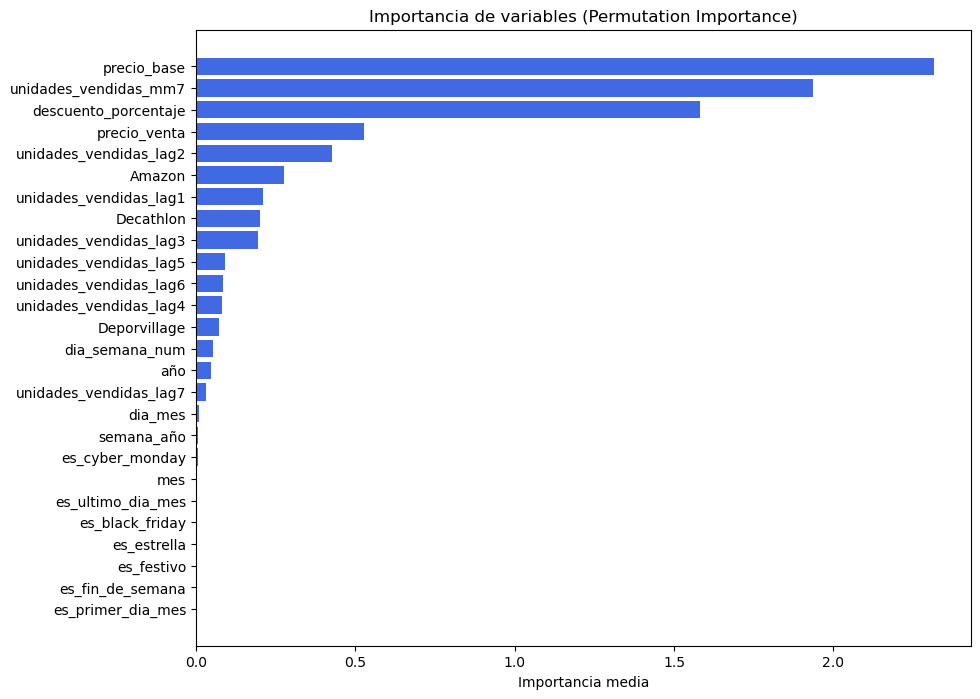

Modelo final guardado en ../models/modelo_final.joblib


In [24]:
# Importancia de variables con permutation importance y guardado del modelo final
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib

# Calcular permutation importance
result = permutation_importance(modelo_final, x_full, y_full, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importancias = result.importances_mean
features = x_full.columns

# Crear DataFrame de importancias y ordenar
importancias_df = pd.DataFrame({'feature': features, 'importance': importancias})
importancias_df = importancias_df.sort_values(by='importance', ascending=False)

# Gráfico de barras horizontales
plt.figure(figsize=(10,8))
plt.barh(importancias_df['feature'], importancias_df['importance'], color='royalblue')
plt.gca().invert_yaxis()
plt.title('Importancia de variables (Permutation Importance)')
plt.xlabel('Importancia media')
plt.show() # Añadido .show() para asegurar que se muestre en un entorno script/notebook
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('Modelo final guardado en ../models/modelo_final.joblib')